In [369]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from matplotlib import pyplot as plt
from matplotlib import rcParams
from numpy.typing import NDArray
from collections import Counter
from functools import lru_cache
from os.path import join as pjoin
from typing import Any, Union
import yaml
import ipywidgets as widgets
from ipywidgets import interact, fixed, IntSlider, FloatSlider
import warnings

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from scipy.integrate import simps

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline , make_pipeline

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
#from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector,SelectFromModel

from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.base import TransformerMixin
from sklearn.cluster import DBSCAN, KMeans, MiniBatchKMeans, AgglomerativeClustering, Birch
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [309]:
df = pd.read_csv(r"C:/Users/Acer/Desktop/study 4 sem/ML/project/datasets/Australian Vehicle Prices.csv", index_col=False)
print("DF Size:" ,df.shape)
df.head(5)

DF Size: (16734, 19)


,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [310]:
#Brand: Name of the car manufacturer
#Year: Year of manufacture or release
#Model: Name or code of the car model
#Car/Suv: Type of the car (car or suv)
#Title: Title or description of the car
#UsedOrNew: Condition of the car (used or new)
#Transmission: Type of transmission (manual or automatic)
#Engine: Engine capacity or power (in litres or kilowatts)
#DriveType: Type of drive (front-wheel, rear-wheel, or all-wheel)
#FuelType: Type of fuel (petrol, diesel, hybrid, or electric)
#FuelConsumption: Fuel consumption rate (in litres per 100 km)
#Kilometres: Distance travelled by the car (in kilometres)
#ColourExtInt: Colour of the car (exterior and interior)
#Location: Location of the car (city and state)
#CylindersinEngine: Number of cylinders in the engine
#BodyType: Shape or style of the car body (sedan, hatchback, coupe, etc.)
#Doors: Number of doors in the car
#Seats: Number of seats in the car
#Price: Price of the car (in Australian dollars)

In [311]:
(df.shape)

(16734, 19)

In [312]:
df.iloc[0]
df.nunique()
df['Price'].unique()
if 0 in df['Price'].unique():
    print("YES")
else:
    print("NO")

NO


In [313]:
df = df[pd.to_numeric(df['Kilometres'], errors='coerce').notna()]
df["Kilometres"] = df["Kilometres"].astype("float")
df = df[pd.to_numeric(df['Kilometres'], errors='coerce').notna()]
df["Kilometres"] = df["Kilometres"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16142 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16142 non-null  object 
 1   Year               16142 non-null  float64
 2   Model              16142 non-null  object 
 3   Car/Suv            16139 non-null  object 
 4   Title              16142 non-null  object 
 5   UsedOrNew          16142 non-null  object 
 6   Transmission       16142 non-null  object 
 7   Engine             16142 non-null  object 
 8   DriveType          16142 non-null  object 
 9   FuelType           16142 non-null  object 
 10  FuelConsumption    16142 non-null  object 
 11  Kilometres         16142 non-null  float64
 12  ColourExtInt       16142 non-null  object 
 13  Location           16142 non-null  object 
 14  CylindersinEngine  16142 non-null  object 
 15  BodyType           15873 non-null  object 
 16  Doors              145

In [314]:
def featureEngine(x):
    x.replace('None', np.nan, inplace=True)
    x.replace('-', np.nan, inplace=True)
    x.replace('nan', np.nan, inplace=True)
    
    x.dropna(subset=['Year'], inplace=True)
    x.dropna(subset=['Price'], inplace=True)
    x.drop(['Title'], axis = 1, inplace = True) 
    
    x.drop(['Car/Suv'], axis = 1, inplace = True)
    
    x['Year'] = x['Year'].astype('float')
    
    x[['EngineCLY','EngineL']] = x['Engine'].astype(str).str.split(", ",expand = True)
    x['Engine'] = x['EngineL']
    x['Engine'] = x['Engine'].astype(str).str.replace(' L', "")
    x.drop(['EngineCLY'], axis = 1, inplace = True) 
    x.drop(['EngineL'], axis = 1, inplace = True)
    x.rename(columns={'Engine': 'EngineL'}, inplace=True)
    x['EngineL'].replace('None', 0, inplace=True)
    x['EngineL'] = x['EngineL'].astype('float')
    
    x[['FuelC','KM']] = x['FuelConsumption'].astype(str).str.split(" / ",expand = True)
    x['FuelConsumption'] = x['FuelC']
    x['FuelConsumption'] = x['FuelConsumption'].astype(str).str.replace(' L', "")
    x.drop(['KM'], axis = 1, inplace = True)
    x.drop(['FuelC'], axis = 1, inplace = True)
    x['FuelConsumption'].replace('nan', 0, inplace=True)
    x['FuelConsumption'] = x['FuelConsumption'].astype('float')
    
    x['Kilometres'] = x['Kilometres']
    
    ll=[]
    for i in x['ColourExtInt']:
        xv=''
        for j in str(i):
            if j=='/':
                pass
            else:
                xv=xv+j
        ll.append(xv)
        xv=''
    x['ColourExtInt']=ll
    x.rename(columns={'ColourExtInt': 'Color'}, inplace=True)
    x['Color'] = x['Color'].astype(str).str.replace(' -', "")
    
    x[['City','State']] = x['Location'].astype(str).str.split(", ",expand = True)
    x['State'].replace({None: np.nan}, inplace=True)
    x.drop(['Location'], axis = 1, inplace = True)
    
    x['CylindersinEngine'] = x['CylindersinEngine'].fillna(0).astype(str)
    x['CylindersinEngine'] = x['CylindersinEngine'].astype(str).str.extract('(\d+)').astype('float32')
    x['CylindersinEngine'] = x['CylindersinEngine'].fillna(0).astype('float')
    
    x['Doors'] = x['Doors'].fillna(0).astype(str)
    x['Doors'] = x['Doors'].astype(str).str.extract('(\d+)').astype('float')
    
    x['Seats'] = x['Seats'].fillna(0).astype(str)
    x['Seats'] = x['Seats'].astype(str).str.extract('(\d+)').astype(float)
    
    x['Price'] = x['Price']
    
    x.replace('None', np.nan, inplace=True)
    x.replace('-', np.nan, inplace=True)
    x.replace('nan', np.nan, inplace=True)


In [315]:
data = df.copy()
featureEngine(data)
new_order = ['Brand',
             'Model',
             'Year',
             'BodyType',
             'UsedOrNew',
             'Transmission',
             'EngineL',
             'DriveType',
             'FuelType',
             'FuelConsumption',
             'Kilometres',
             'Color',
             'CylindersinEngine',
             'Doors', 
             'Seats',
             'State',
             'City',
             'Price']  
data = data.reindex(columns=new_order)
data.head(5)

,Brand,Model,Year,BodyType,UsedOrNew,Transmission,EngineL,DriveType,FuelType,FuelConsumption,Kilometres,Color,CylindersinEngine,Doors,Seats,State,City,Price
0,Ssangyong,Rexton,2022.0,SUV,DEMO,Automatic,2.2,AWD,Diesel,8.7,5595.0,White Black,4.0,4.0,7.0,NSW,Caringbah,51990
1,MG,MG3,2022.0,Hatchback,USED,Automatic,1.5,Front,Premium,6.7,16.0,Black Black,4.0,5.0,5.0,NSW,Brookvale,19990
2,BMW,430I,2022.0,Coupe,USED,Automatic,2.0,Rear,Premium,6.6,8472.0,Grey White,4.0,2.0,4.0,NSW,Sylvania,108988
3,Mercedes-Benz,E500,2011.0,Coupe,USED,Automatic,5.5,Rear,Premium,11.0,136517.0,White Brown,8.0,2.0,4.0,NSW,Mount Druitt,32990
4,Renault,Arkana,2022.0,SUV,USED,Automatic,1.3,Front,Unleaded,6.0,1035.0,Grey Black,4.0,4.0,5.0,NSW,Castle Hill,34990


In [316]:
def safe_convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return float('nan')

# List of numeric features
features_num = ['Year', 'EngineL', 'FuelConsumption', 'Kilometres', 'CylindersinEngine', 'Doors', 'Seats', 'Price']
features_col = ['Brand', 'Model', 'BodyType', 'UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'Color', 'State', 'City']

# Apply the safe conversion to the relevant columns
for columna in features_num:
    data[columna] = data[columna].apply(safe_convert_to_float)
    data.replace('nan', np.nan, inplace=True)
    
# Instantiate the KNN imputer
knnimputer = KNNImputer(n_neighbors=5)

# Impute the missing values
data[features_num] = knnimputer.fit_transform(data[features_num])
data.dropna(subset=features_num, inplace=True)
data

,Brand,Model,Year,BodyType,UsedOrNew,Transmission,EngineL,DriveType,FuelType,FuelConsumption,Kilometres,Color,CylindersinEngine,Doors,Seats,State,City,Price
0,Ssangyong,Rexton,2022.0,SUV,DEMO,Automatic,2.2,AWD,Diesel,8.7,5595.0,White Black,4.0,4.0,7.0,NSW,Caringbah,51990.0
1,MG,MG3,2022.0,Hatchback,USED,Automatic,1.5,Front,Premium,6.7,16.0,Black Black,4.0,5.0,5.0,NSW,Brookvale,19990.0
2,BMW,430I,2022.0,Coupe,USED,Automatic,2.0,Rear,Premium,6.6,8472.0,Grey White,4.0,2.0,4.0,NSW,Sylvania,108988.0
3,Mercedes-Benz,E500,2011.0,Coupe,USED,Automatic,5.5,Rear,Premium,11.0,136517.0,White Brown,8.0,2.0,4.0,NSW,Mount Druitt,32990.0
4,Renault,Arkana,2022.0,SUV,USED,Automatic,1.3,Front,Unleaded,6.0,1035.0,Grey Black,4.0,4.0,5.0,NSW,Castle Hill,34990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,Alphard,2014.0,Commercial,USED,Automatic,0.0,Front,Unleaded,0.0,66000.0,Grey,0.0,7.0,0.0,QLD,Rocklea,29500.0
16730,Mercedes-Benz,S-Class,2012.0,NaN,USED,Automatic,0.0,Rear,Diesel,0.0,117432.0,Silver,0.0,0.0,0.0,VIC,Port Melbourne,39888.0
16731,Suzuki,Vitara,2022.0,SUV,DEMO,Automatic,1.6,Front,Unleaded,6.2,5165.0,Yellow,4.0,4.0,5.0,QLD,Dinmore,35280.0
16732,Mercedes-Benz,GLC250,2016.0,SUV,USED,Automatic,2.0,AWD,Premium,7.2,85525.0,Grey Black,4.0,4.0,5.0,QLD,Albion,41888.0


In [317]:
#data['CylindersinEngine'].nunique()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16142 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16142 non-null  object 
 1   Year               16142 non-null  float64
 2   Model              16142 non-null  object 
 3   Car/Suv            16139 non-null  object 
 4   Title              16142 non-null  object 
 5   UsedOrNew          16142 non-null  object 
 6   Transmission       16142 non-null  object 
 7   Engine             16142 non-null  object 
 8   DriveType          16142 non-null  object 
 9   FuelType           16142 non-null  object 
 10  FuelConsumption    16142 non-null  object 
 11  Kilometres         16142 non-null  float64
 12  ColourExtInt       16142 non-null  object 
 13  Location           16142 non-null  object 
 14  CylindersinEngine  16142 non-null  object 
 15  BodyType           15873 non-null  object 
 16  Doors              145

In [318]:
for col in df.select_dtypes('object').columns:
  print(col,' ',df[col].nunique())

Brand   70
Model   741
Car/Suv   608
Title   8401
UsedOrNew   3
Transmission   3
Engine   92
DriveType   5
FuelType   9
FuelConsumption   153
ColourExtInt   802
Location   617
CylindersinEngine   10
BodyType   10
Doors   13
Seats   12
Price   3405


In [345]:
data.nunique()
data.isnull().sum()
data.info()

Brand                  0
Model                  0
Year                   0
BodyType             269
UsedOrNew              0
Transmission         217
EngineL                0
DriveType              0
FuelType             560
FuelConsumption        0
Kilometres             0
Color                  0
CylindersinEngine      0
Doors                  0
Seats                  0
State                  0
City                   0
Price                  0
dtype: int64

In [320]:
for col in data.select_dtypes('object').columns:
  print(col,': ',data[col].nunique())

Brand :  70
Model :  741
BodyType :  10
UsedOrNew :  3
Transmission :  2
DriveType :  5
FuelType :  8
Color :  802
State :  9
City :  605


In [321]:
data.isnull().sum()

Brand                  0
Model                  0
Year                   0
BodyType             269
UsedOrNew              0
Transmission         217
EngineL                0
DriveType              0
FuelType             560
FuelConsumption        0
Kilometres             0
Color                  0
CylindersinEngine      0
Doors                  0
Seats                  0
State                  0
City                   0
Price                  0
dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

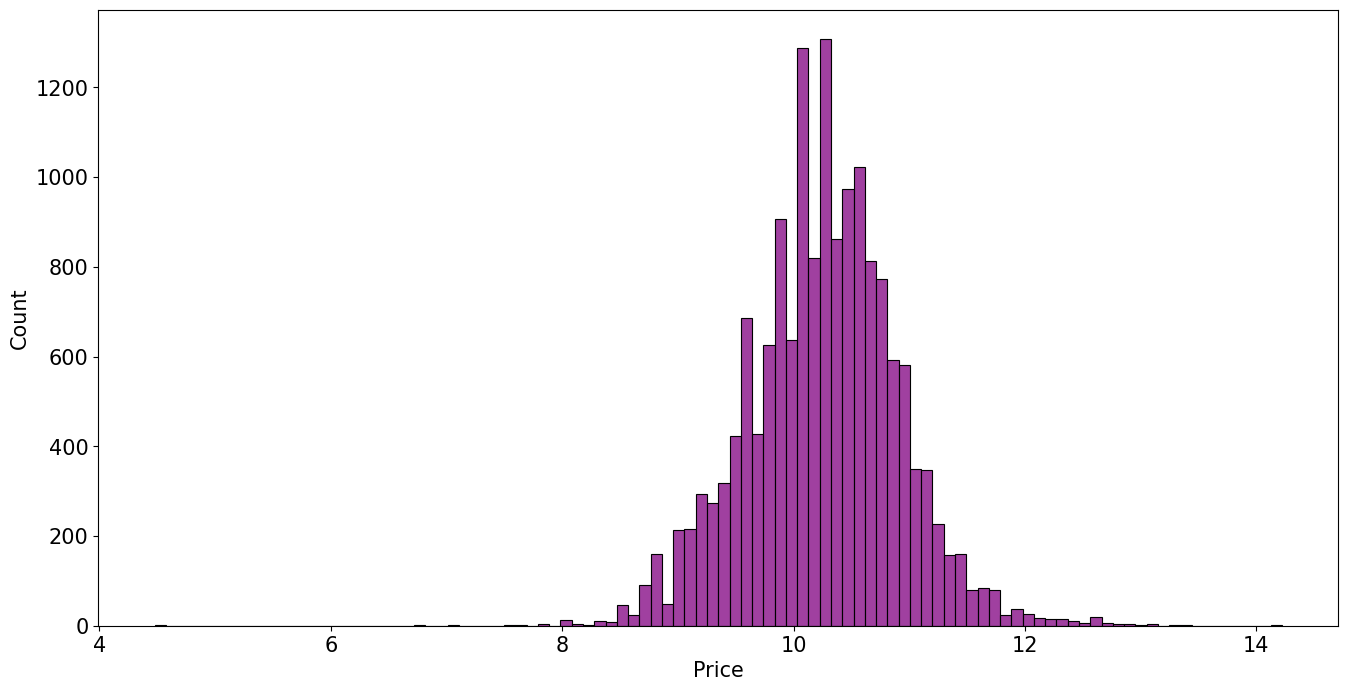

In [338]:
pattern = data[data['Kilometres'] <= 400]
sns.histplot((data['Price']), bins = 100, color = "purple")

In [336]:
data_copy = data.copy()

data_copy['Kilometres'] = np.log(data_copy['Kilometres'])
data_copy['Price'] = np.log(data_copy['Price'])

x=data_copy.drop(['Price'],axis=1)
y=data_copy['Price']

C:\Users\Acer\AppData\Local\Temp\ipykernel_9384\2124182613.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_copy.corr()


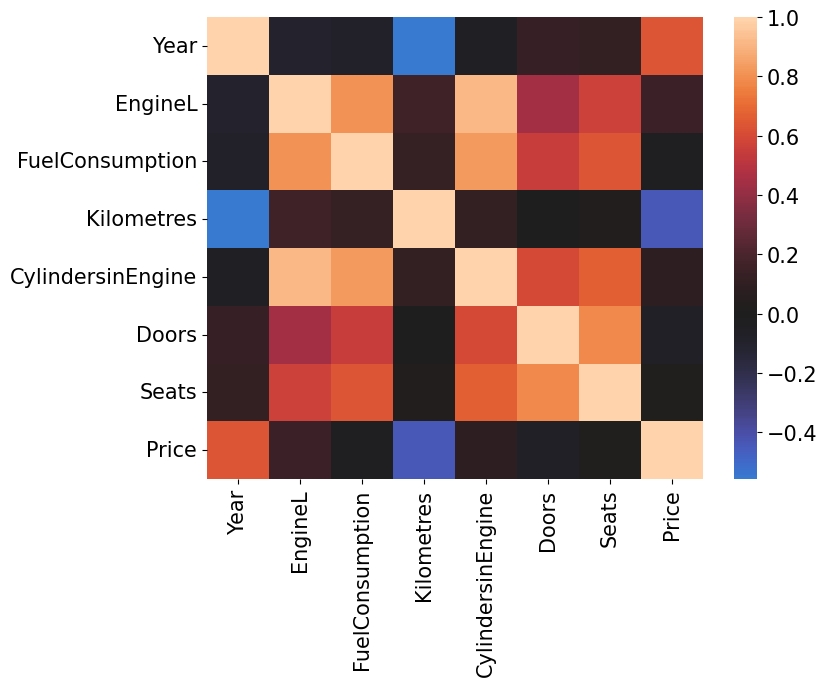

C:\Users\Acer\AppData\Local\Temp\ipykernel_9384\2124182613.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_copy.corr()


,Year,EngineL,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
Year,1.000000,-0.100913,-0.077738,-0.557336,-0.051106,0.134067,0.114156,0.635093
EngineL,-0.100913,1.000000,0.811352,0.163482,0.912268,0.441284,0.564636,0.146649
FuelConsumption,-0.077738,0.811352,1.000000,0.118333,0.826025,0.543882,0.639114,-0.023026
Kilometres,-0.557336,0.163482,0.118333,1.000000,0.115426,0.007365,0.026697,-0.438368
CylindersinEngine,-0.051106,0.912268,0.826025,0.115426,1.000000,0.594440,0.659742,0.090187
Doors,0.134067,0.441284,0.543882,0.007365,0.594440,1.000000,0.786271,-0.069767
Seats,0.114156,0.564636,0.639114,0.026697,0.659742,0.786271,1.000000,0.016162
Price,0.635093,0.146649,-0.023026,-0.438368,0.090187,-0.069767,0.016162,1.000000


In [340]:
corr = data_copy.corr()
plt.figure(1, figsize=(8, 6))  # Increase the height of the heatmap
sns.heatmap(corr,center=0)  # Reduce the font size of annotations
plt.show()
data_copy.corr()

In [ ]:
data_copy.shape

In [ ]:
feature_numeric = [cname for cname in data.columns if data[cname].dtype == "float"]
feature_columnas = [cname for cname in data.columns if data[cname].dtype == "object"]
data[feature_columnas] = data[feature_columnas].astype("str")
print(feature_numeric)
print(feature_columnas)

In [343]:
ohe_col=['UsedOrNew','Transmission','DriveType']
be_col=['FuelType','Color','BodyType','Brand', 'Model', 'State','City']

In [342]:
transform=ColumnTransformer(transformers=[
    ('Ohe',OneHotEncoder(sparse_output=False,drop='first'),ohe_col),
    ('Be',ce.BinaryEncoder(),be_col)
],remainder='passthrough')

In [344]:
transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('Ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['UsedOrNew', 'Transmission', 'DriveType']),
                                ('Be', BinaryEncoder(),
                                 ['FuelType', 'Color', 'BodyType', 'Brand',
                                  'Model', 'State', 'City'])])

In [ ]:
models = [
    ('lr',LinearRegression()),
    ('Lasso',Lasso()),
    ('Ridge',Ridge()),
    ('ElasticNet', ElasticNet()),
    ('Knn',KNeighborsRegressor()),
    ('DT',DecisionTreeRegressor()),
    ('Bagging',BaggingRegressor()),
    ('RT',RandomForestRegressor()),
    ('XGB',XGBRegressor()),    
    ('LGBM', LGBMRegressor(verbose=-1)),
    ('CatBoost', CatBoostRegressor(silent=True)),
    ('GBR', GradientBoostingRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ('ExtraTrees', ExtraTreesRegressor())
    ##not worked('SVC',SVR()),
]

In [346]:
for col in df.select_dtypes('object').columns:
  print(col,' ',df[col].unique())

Brand   ['Ssangyong' 'MG' 'BMW' 'Mercedes-Benz' 'Renault' 'Toyota' 'Land' 'Nissan'
 'Honda' 'Volkswagen' 'Mitsubishi' 'Ford' 'Subaru' 'Hyundai' 'Jeep'
 'Volvo' 'Mazda' 'Abarth' 'Holden' 'Audi' 'Kia' 'Mini' 'Peugeot' 'Suzuki'
 'Dodge' 'Porsche' 'Daihatsu' 'Isuzu' 'Lexus' 'Jaguar' 'Rolls-Royce'
 'Skoda' 'Fiat' 'Haval' 'Citroen' 'LDV' 'HSV' 'Foton' 'Mahindra'
 'Maserati' 'Alfa' 'GWM' 'Ram' 'Tesla' 'Genesis' 'Chrysler' 'Great' 'Opel'
 'Saab' 'Bentley' 'Rover' 'Ferrari' 'Cupra' 'Chevrolet' 'Lamborghini'
 'FPV' 'McLaren' 'Chery' 'Iveco' 'Hummer' 'Infiniti' 'BYD' 'Tata' 'Aston'
 'Daewoo' 'Proton' 'Geely' 'Smart' 'Datsun' 'Packard']
Model   ['Rexton' 'MG3' '430I' 'E500' 'Arkana' 'Estima' 'Rover' 'Pulsar' '86'
 'Jazz' 'HiAce' 'City' 'Golf' 'X3' 'Outlander' '118D' 'Fiesta' 'Amarok'
 'Outback' 'Mirage' 'Camry' '3' 'I45' 'Territory' 'Qashqai' 'T-Cross'
 'Tucson' 'Focus' 'X-Trail' 'Corolla' 'Yaris' 'Grand' 'Patriot' 'S60'
 'Triton' 'E250' 'A250' 'CX-5' 'Falcon' '595' 'CR-V' 'I30' '6' 'Kluger'
 'San

In [ ]:
data_copy.info()

In [347]:
for model in models:
  print(model[0])
  PL=make_pipeline(transform,
                   StandardScaler(),

                   model[1])

  cv=cross_validate(
    estimator=PL,
    X=x,
    y=y,
    cv=7, #train 6/7 test 1/7
    return_train_score=True,
    scoring=[
             'r2',
             'neg_mean_squared_error',#Negative Mean Squared Error, which is used to measure the average of the squares of the errors. 
             ]
    )
  print(model[0],'train r2 score = ',cv['train_r2'].mean())
  print(model[0],'test r2 score = ',cv['test_r2'].mean())
  print('-'*30)

lr
lr train r2 score =  0.6992071178580945
lr test r2 score =  0.6704348230642506
------------------------------
Lasso
Lasso train r2 score =  0.0
Lasso test r2 score =  -0.011745018764485955
------------------------------
Ridge
Ridge train r2 score =  0.6992071035731418
Ridge test r2 score =  0.6704394280607496
------------------------------
ElasticNet
ElasticNet train r2 score =  0.0
ElasticNet test r2 score =  -0.011745018764485955
------------------------------
Knn
Knn train r2 score =  0.7669649271079283
Knn test r2 score =  0.6178826690886499
------------------------------
DT
DT train r2 score =  0.9999837451051717
DT test r2 score =  0.735032033110865
------------------------------
Bagging
Bagging train r2 score =  0.9743144952352255
Bagging test r2 score =  0.8539961886990058
------------------------------
RT
RT train r2 score =  0.9826093778197372
RT test r2 score =  0.8729123726164201
------------------------------
XGB
XGB train r2 score =  0.9685029451227772
XGB test r2 scor

In [ ]:
#best ExtraTrees, CatBoost, LGBM, XGB, RT, Bagging

In [ ]:
best_models = [
    ('Bagging',BaggingRegressor()),
    ('XGB',XGBRegressor()),    
    ('LGBM', LGBMRegressor(verbose=-1)),
    ('CatBoost', CatBoostRegressor(silent=True))
]

In [348]:
for model in best_models:
  print(model[0])
  PL=make_pipeline(transform,
                   StandardScaler(),

                   model[1])

  cv=cross_validate(
    estimator=PL,
    X=x,
    y=y,
    cv=5,
    return_train_score=True,
    scoring=[
             'r2',
             'neg_mean_squared_error',
             'neg_mean_absolute_error'
             ]
    )
  print(model[0],'train r2 score = ',cv['train_r2'].mean())
  print(model[0],'test r2 score = ',cv['test_r2'].mean())
  print(model[0],'train mean_squared_error = ',np.abs(cv['train_neg_mean_squared_error'].mean()))
  print(model[0],'test mean_squared_error = ',np.abs(cv['test_neg_mean_squared_error'].mean()))
  print(model[0],'train mean_absolute_error = ',np.abs(cv['train_neg_mean_absolute_error'].mean()))
  print(model[0],'test mean_absolute_error = ',np.abs(cv['test_neg_mean_absolute_error'].mean()))
  print('-'*30)

Bagging
Bagging train r2 score =  0.9742344239231884
Bagging test r2 score =  0.8530918193528316
Bagging train mean_squared_error =  0.011052300347581567
Bagging test mean_squared_error =  0.06279232846037552
Bagging train mean_absolute_error =  0.06532351514405461
Bagging test mean_absolute_error =  0.16582467646126212
------------------------------
XGB
XGB train r2 score =  0.9706412173973472
XGB test r2 score =  0.8895784260022319
XGB train mean_squared_error =  0.012595869307095272
XGB test mean_squared_error =  0.04718941112841164
XGB train mean_absolute_error =  0.08426703958044722
XGB test mean_absolute_error =  0.14430654210786603
------------------------------
LGBM
LGBM train r2 score =  0.923561930990839
LGBM test r2 score =  0.8804008721137331
LGBM train mean_squared_error =  0.0327885901482845
LGBM test mean_squared_error =  0.05113578193317999
LGBM train mean_absolute_error =  0.13163903364484225
LGBM test mean_absolute_error =  0.15471719158773567
------------------------

In [ ]:
#PL=make_pipeline(transform,
#                  StandardScaler(),
#
#                  XGBRegressor())
#
#XGB_params=[
#    {
#        'xgbregressor__learning_rate':[0.05,0.1,0.15,0.20,0.25,0.30],
#        'xgbregressor__max_depth':[3,4,5,6,8,10,12,15],
#        'xgbregressor__min_child_weight':[1,3,5,7],
#        'xgbregressor__gamma':[0.0,0.1,0.2,0.3,0.4],
#        'xgbregressor__colsample_bytree':[0.3,0.4,0.5,0.7]
#
#    }
#]
#
#XGBRegressor_RS = RandomizedSearchCV(PL, XGB_params,n_iter=80, scoring='r2', cv=5,n_jobs=-1)
#XGBRegressor_RS.fit(x,y)

In [ ]:
#print("Best value for lambda : ",XGBRegressor_RS.best_params_)
#print("Best score for cost function: ", XGBRegressor_RS.best_score_)

In [352]:
PL=make_pipeline(transform,
                  MinMaxScaler(),


                  XGBRegressor(min_child_weight= 1, max_depth= 8, learning_rate= 0.15, gamma= 0.0, colsample_bytree= 0.4))

cv=cross_validate(estimator=PL,X=x,y=y,cv=10,return_train_score=True,scoring=['r2','neg_mean_absolute_error'])
print('train r2 score = ',cv['train_r2'].mean())
print('test r2 score = ',cv['test_r2'].mean())
print('train mean_squared_error = ',np.abs(cv['train_neg_mean_absolute_error'].mean()))
print('test mean_squared_error = ',np.abs(cv['test_neg_mean_absolute_error'].mean()))  
print('train mean_absolute_error = ',np.abs(cv['train_neg_mean_absolute_error'].mean()))
print('test mean_absolute_error = ',np.abs(cv['test_neg_mean_absolute_error'].mean()))

train r2 score =  0.9785458180874711
test r2 score =  0.8972241792099493
train mean_squared_error =  0.07189264349233768
test mean_squared_error =  0.13656601883345781
train mean_absolute_error =  0.07189264349233768
test mean_absolute_error =  0.13656601883345781


In [ ]:
#PL_BA=make_pipeline(transform,
#                  StandardScaler(),
#
#                  BaggingRegressor())
#
#BA_params=[
#    {
#        'baggingregressor__bootstrap': [True,False],
#
#'baggingregressor__max_features': [1.0,2.0,3.0],
#'baggingregressor__max_samples': [1.0,1.5,2.0,3.0],
#'baggingregressor__n_estimators': [10,50,100,200]
#
#    }
#]
#
#Bagging_Regressor = RandomizedSearchCV(PL_BA, BA_params,n_iter=4, scoring='r2', cv=10,n_jobs=-1)
#Bagging_Regressor.fit(x,y)

In [ ]:
#print("Best value for lambda : ",Bagging_Regressor.best_params_)
#print("Best score for cost function: ", Bagging_Regressor.best_score_)

In [353]:
PL=make_pipeline(transform,
                StandardScaler(),

                BaggingRegressor(n_estimators= 200,max_samples= 1.0,max_features= 1.0,bootstrap= True))

cv=cross_validate(estimator=PL,X=x,y=y,cv=5,return_train_score=True,scoring=['r2','neg_mean_absolute_error'])
print('train r2 score = ',cv['train_r2'].mean())
print('test r2 score = ',cv['test_r2'].mean()))
print('train mean_squared_error = ',np.abs(cv['train_neg_mean_absolute_error'].mean()))
print('test mean_absolute_error = ',np.abs(cv['test_neg_mean_absolute_error'].mean())) 
print('train mean_absolute_error = ',np.abs(cv['train_neg_mean_absolute_error'].mean()))
print('test mean_absolute_error = ',np.abs(cv['test_neg_mean_absolute_error'].mean()))

train r2 score =  0.9828182298074155
test r2 score =  0.8696650209556938
train mean_squared_error =  -0.05532946361347414
test mean_absolute_error =  -0.15387422388081778
train mean_absolute_error =  0.05532946361347414
test mean_absolute_error =  0.15387422388081778


In [ ]:
#PL_CAT=make_pipeline(transform,
#                  StandardScaler(),
#
#                  CatBoostRegressor(silent=True))
#
#CAT_params=[
#    {
#        'catboostregressor__learning_rate':[0.28,0.25,0.27,0.30,0.29,0.31,0.32],
#        'catboostregressor__depth':[7,8,9],
#        'catboostregressor__iterations':[400,500,600],
#        'catboostregressor__l2_leaf_reg':[1,3,5,7,9]
#    }
#]
#
#CAT_Regressor = RandomizedSearchCV(PL_CAT, CAT_params,n_iter=10, scoring='r2', cv=10,n_jobs=-1)
#CAT_Regressor.fit(x,y)

In [ ]:
#print("Best value for lambda : ",CAT_Regressor.best_params_)
#print("Best score for cost function: ", CAT_Regressor.best_score_)

In [354]:
PL=make_pipeline(transform,
                MinMaxScaler(),

                CatBoostRegressor(learning_rate= 0.27,depth= 8,iterations= 500,l2_leaf_reg = 5,silent= True))

cv=cross_validate(estimator=PL,X=x,y=y,cv=10,return_train_score=True,scoring=['r2','neg_mean_absolute_error'])
print('train r2 score = ',cv['train_r2'].mean())
print('test r2 score = ',cv['test_r2'].mean())
print('train mean_squared_error = ',np.abs(cv['train_neg_mean_absolute_error'].mean()))
print('test mean_absolute_error = ',np.abs(cv['test_neg_mean_absolute_error'].mean()))
print('train mean_absolute_error = ',np.abs(cv['train_neg_mean_absolute_error'].mean()))
print('test mean_absolute_error = ',np.abs(cv['test_neg_mean_absolute_error'].mean()))

train r2 score =  0.9884262344478587
test r2 score =  0.9114956933853036
train mean_squared_error =  -0.052982769483508
test mean_absolute_error =  -0.12641731595994232
train mean_absolute_error =  0.052982769483508
test mean_absolute_error =  0.12641731595994232


In [ ]:
data_copy.info()

In [355]:
features_cat = ['Brand', 'Model', 'UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'Color', 'BodyType', 'District', 'City']
data_c = data_copy.copy()
le = LabelEncoder()
for columna in feature_columnas:
    data_c[columna] = le.fit_transform(data_copy[columna])

In [356]:
data_c.isna().sum()
data_c = data_c.astype(float)
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16140 entries, 0 to 16733
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16140 non-null  float64
 1   Model              16140 non-null  float64
 2   Year               16140 non-null  float64
 3   BodyType           16140 non-null  float64
 4   UsedOrNew          16140 non-null  float64
 5   Transmission       16140 non-null  float64
 6   EngineL            16140 non-null  float64
 7   DriveType          16140 non-null  float64
 8   FuelType           16140 non-null  float64
 9   FuelConsumption    16140 non-null  float64
 10  Kilometres         16140 non-null  float64
 11  Color              16140 non-null  float64
 12  CylindersinEngine  16140 non-null  float64
 13  Doors              16140 non-null  float64
 14  Seats              16140 non-null  float64
 15  State              16140 non-null  float64
 16  City               161

In [357]:
dfs: list[pd.DataFrame] = []
for n in data_c:
    dfs.append(data_c)

cols = dfs[0].columns
clust_cols = [ "Kilometres","Price"]  # 2 основных канала

dfs[0]

,Brand,Model,Year,BodyType,UsedOrNew,Transmission,EngineL,DriveType,FuelType,FuelConsumption,Kilometres,Color,CylindersinEngine,Doors,Seats,State,City,Price
0,62.0,589.0,2022.0,6.0,0.0,0.0,2.2,1.0,0.0,8.7,8.629629,639.0,4.0,4.0,7.0,2.0,109.0,10.858807
1,41.0,469.0,2022.0,3.0,2.0,0.0,1.5,2.0,6.0,6.7,2.772589,38.0,4.0,5.0,5.0,2.0,77.0,9.902987
2,4.0,62.0,2022.0,2.0,2.0,0.0,2.0,4.0,6.0,6.6,9.044522,396.0,4.0,2.0,4.0,2.0,515.0,11.598993
3,46.0,265.0,2011.0,2.0,2.0,0.0,5.5,4.0,6.0,11.0,11.824204,683.0,8.0,2.0,4.0,2.0,365.0,10.403960
4,56.0,120.0,2022.0,6.0,2.0,0.0,1.3,2.0,7.0,6.0,6.942157,300.0,4.0,4.0,5.0,2.0,115.0,10.462818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,67.0,115.0,2014.0,0.0,2.0,0.0,0.0,2.0,7.0,0.0,11.097410,275.0,0.0,7.0,0.0,4.0,451.0,10.292146
16730,46.0,596.0,2012.0,10.0,2.0,0.0,0.0,4.0,0.0,0.0,11.673615,485.0,0.0,0.0,0.0,7.0,436.0,10.593831
16731,64.0,701.0,2022.0,6.0,0.0,0.0,1.6,2.0,7.0,6.2,8.549660,785.0,4.0,4.0,5.0,4.0,165.0,10.471072
16732,46.0,339.0,2016.0,6.0,2.0,0.0,2.0,1.0,6.0,7.2,11.356564,300.0,4.0,4.0,5.0,4.0,4.0,10.642755


In [358]:
def scatterplot2d(
    df: pd.DataFrame,
    col1: str = "Kilometres",
    col2: str = "Price",
    labels: Union[pd.Series, NDArray[np.int_]] = None,
    dots_size: int = 5,
    palette: str = "coolwarm",
) -> None:
    fig, _ = plt.subplots()
    sns.scatterplot(x=df[col1], y=df[col2], hue=labels, s=dots_size, palette=palette)
    fig.canvas.draw()

In [359]:
%matplotlib inline
rcParams["font.size"] = 15
rcParams["figure.figsize"] = 16, 8

In [360]:
def clust_and_viz(
    df: pd.DataFrame,
    clust_cols: list[str],
    clusterer: Any,
    dots_size: int = 5,
    palette: str = "coolwarm",
):
    clusterer.fit(df[clust_cols])
    labels = clusterer.labels_

    print(f"Число кластеров: {len(set(labels))}")

    scatterplot2d(
        df=df,
        col1=clust_cols[0],
        col2=clust_cols[1],
        labels=labels,
        dots_size=dots_size,
        palette=palette,
    )

    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

    return labels

In [361]:
# Нормализуем!
df = dfs[0].copy()
df_scaled = df.copy()

scaler = StandardScaler()
df_scaled[cols] = scaler.fit_transform(df_scaled[cols])

20

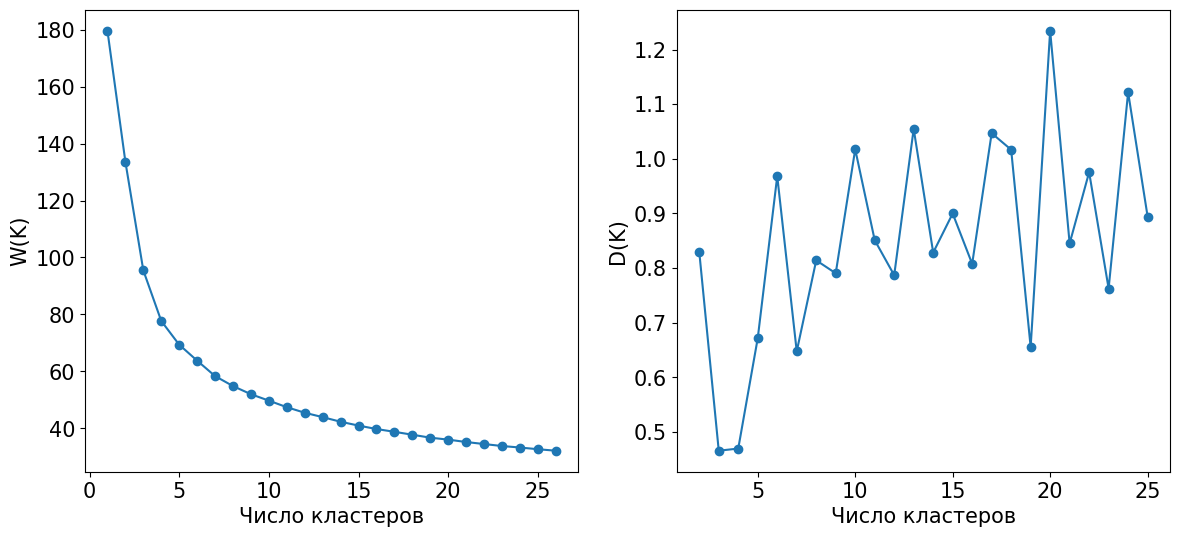

In [362]:
def run_elbow_method(
    df: pd.DataFrame,
    clust_cols: list[str],
    max_k: int = 25,
    n_init: int = 10,
    seed: int = 42,
    plot_results: bool = True,
) -> int:
    w_k = []
    for k in range(1, max_k + 2):
        kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=seed).fit(
            df[clust_cols]
        )
        w_k.append(np.sqrt(kmeans.inertia_))

    # аналитический способ выбора оптимального количества кластеров
    d_k = []
    for idx in range(1, max_k):
        d_k.append(abs(w_k[idx] - w_k[idx + 1]) / abs(w_k[idx - 1] - w_k[idx]))

    if plot_results:
        fig, axs = plt.subplots(1, 2, figsize=(14, 6))
        axs[0].plot(range(1, max_k + 2), w_k, marker="o")
        axs[0].set_xlabel("Число кластеров")
        axs[0].set_ylabel("W(K)")
        axs[1].plot(range(2, max_k + 1), d_k, marker="o")
        axs[1].set_xlabel("Число кластеров")
        axs[1].set_ylabel("D(K)")

    return np.argmax(d_k) + 2


run_elbow_method(df=df_scaled, clust_cols=clust_cols)

In [365]:
def plot_sorted_nn_dists(df: pd.DataFrame, min_pts: int = 4) -> None:
    neighbors_fit = NearestNeighbors(n_neighbors=min_pts).fit(df)
    distances, indices = neighbors_fit.kneighbors(df)
    distances = np.sort(distances, axis=0)
    distances = distances[:, 1]

    plt.figure()
    plt.plot(distances)

In [386]:
clustering = {
    "dbscan": {
        "method": DBSCAN,
        "params_range": {
            "eps": [*np.arange(0.1, 0.01, -0.01)],
            "min_samples": [*range(25, 0, -1)],
            "metric": ["euclidean", "manhattan"],
            "n_jobs": [*range(1, 5), -1],
        },
    },
    "kmeans": {
        "method": KMeans,
        "params_range": {
            "n_clusters": [*range(2, 31)],
            "n_init": [*range(3, 26)],
            "random_state": 42,
        },
    },
    "mbkmeans": {
        "method": MiniBatchKMeans,
        "params_range": {
            "n_clusters": [*range(2, 31)],
            "batch_size": [*range(100, 1001, 100)],
            "n_init": [*range(3, 26)],
            "random_state": 42,
        },
    },
    "agglomerative": {
        "method": AgglomerativeClustering,
        "params_range": {
            "n_clusters": [*range(2, 31)],
            "linkage": ["ward", "complete", "average", "single"],
        },
    },
    "birch": {
        "method": Birch,
        "params_range": {
            "threshold": [*np.arange(0.1, 1.1, 0.1)],
            "branching_factor": [*range(20, 101, 10)],
            "n_clusters": [*range(2, 31)],
        },
    },
}

In [371]:
class InteractiveClusterer:
    def __init__(
        self,
        method: Any,
        params_range: dict[str, Any],
        dfs: list[pd.DataFrame],
        scaler: TransformerMixin = StandardScaler(),
    ) -> None:
        self.method = method
        self.clusterer: Any = None
        self.params_range = params_range
        self.dfs = dfs
        self.curr_df = None

    @lru_cache(maxsize=None)
    def fit_predict(
        self,
        patient: int = 0,
        col1: str = "Kilometres",
        col2: str = "Price",
        do_scaling: bool = False,
        **kwargs,
    ) -> NDArray[np.int_]:
        self.clusterer = self.method(**kwargs)
        self.clusterer.fit(self.curr_df)
        return self.clusterer.labels_

    def analysis2d(
        self,
        print_clust_num: bool = False,
        dots_size: int = 5,
        palette: str = "coolwarm",
        patient: int = 0,
        col1: str = "Kilometres",
        col2: str = "Price",
        do_scaling: bool = True,
        plot_scaled: bool = True,
        **kwargs,
    ) -> None:
        self.curr_df = self.dfs[patient][[col1, col2]].copy()

        if do_scaling:
            self.curr_df[self.curr_df.columns] = scaler.fit_transform(self.curr_df)

        labels = self.fit_predict(
            patient=patient, col1=col1, col2=col2, do_scaling=do_scaling, **kwargs
        )

        if print_clust_num:
            print("Число кластеров:", len(set(labels)))

        scatterplot2d(
            df=self.curr_df if plot_scaled else self.dfs[patient],
            col1=col1,
            col2=col2,
            labels=labels,
            dots_size=dots_size,
            palette=palette,
        )



In [372]:
def create_clusterer(method_name, print_clust_num, dots_size, palette, patient, col1, col2, do_scaling, plot_scaled, **params):
    scaler = MinMaxScaler()  # or StandardScaler() depending on the user's choice
    clusterer = InteractiveClusterer(**clustering[method_name], dfs=dfs, scaler=scaler)
    clusterer.analysis2d(
        print_clust_num=print_clust_num,
        dots_size=dots_size,
        palette=palette,
        patient=patient,
        col1=col1,
        col2=col2,
        do_scaling=do_scaling,
        plot_scaled=plot_scaled,
        **params
    )

In [373]:
def update_interact(method_name):
    params = clustering[method_name]['params_range']
    interact(create_clusterer,
             method_name=widgets.fixed(method_name),
             print_clust_num=widgets.Checkbox(value=True, description='Print Cluster Number'),
             dots_size=widgets.IntSlider(min=1, max=25, step=1, value=5, description='Dots Size'),
             palette=widgets.Dropdown(options=["coolwarm", "bright"], value="coolwarm", description="Palette"),
             patient=widgets.IntSlider(min=0, max=9, step=1, value=0, description='Patient'),
             col1=widgets.Dropdown(options=cols, value=cols[0], description="Col1"),
             col2=widgets.Dropdown(options=cols, value=cols[1], description="Col2"),
             do_scaling=widgets.Checkbox(value=False, description='Do Scaling'),
             plot_scaled=widgets.Checkbox(value=False, description='Plot Scaled'),
             **{key: widgets.Select(options=value) if isinstance(value, list) else widgets.fixed(value)
                for key, value in params.items()})

In [388]:
warnings.filterwarnings("ignore", message=".*MiniBatchKMeans is known to have a memory leak.*")

# Dropdown for method selection
method_dropdown = widgets.Dropdown(
    options=['dbscan', 'kmeans', 'mbkmeans',"agglomerative","birch"],
    value='dbscan',
    description='Method:',
)

# Link the dropdown to the update function
widgets.interactive(update_interact, method_name=method_dropdown)

interactive(children=(Dropdown(description='Method:', options=('dbscan', 'kmeans', 'mbkmeans', 'agglomerative'…